In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
CREATE_EMBEDDINGS = False

if CREATE_EMBEDDINGS:

    from data import get_images, IMG_SIZE, get_embeddings
    from models import embedding_network_contrastive
    import tensorflow as tf

    DATASET_DIR = "../../data/dataset_condensed/cropped_head/direction"

    with open("../../data/classes_condensed_head.txt") as file:
        classes = [line.strip() for line in file]

        X, y = get_images(DATASET_DIR, classes, IMG_SIZE)

        X = np.array(X)
        X = tf.keras.applications.inception_v3.preprocess_input(X)
        y = np.array(y)

        embedding_model = embedding_network_contrastive
        embedding_model.load_weights('../models/embedding')
        X_embeddings, y_embeddings = get_embeddings(embedding_model, X, y)

        columns = ["x" + str(i) for i in range(128)] + ["y"]
        df = pd.DataFrame(np.column_stack([X_embeddings, y_embeddings]), columns=columns)
        df = df.astype({"y": int})
        df.to_csv("../embeddings/embeddings.csv", index=False)

else:

    CSV_FILE = '../embeddings.csv'

    df = pd.read_csv(CSV_FILE)

    df.head()

In [3]:
FILTER = True
if FILTER:
    df = df[df["y"] < 100]
    df = df.reset_index(drop=True)


In [4]:
df = df.astype({"y": int})
df.describe()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x119,x120,x121,x122,x123,x124,x125,x126,x127,y
count,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,...,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000
mean,0.007050,0.001617,-0.016266,0.020080,0.012139,0.005442,0.002723,-0.018426,-0.013624,-0.010101,...,-0.002817,0.008619,-0.005006,0.007331,-0.000243,-0.013136,0.025504,-0.015641,-0.013796,49.668367
std,0.082368,0.079409,0.071199,0.100790,0.080027,0.082274,0.097079,0.095265,0.090361,0.098082,...,0.078432,0.086336,0.091035,0.088498,0.100660,0.089292,0.076050,0.108381,0.096453,28.476121
min,-0.168025,-0.206713,-0.226542,-0.248393,-0.201537,-0.172514,-0.237564,-0.260862,-0.240782,-0.283244,...,-0.197356,-0.211342,-0.217266,-0.202781,-0.306089,-0.227543,-0.158399,-0.325597,-0.258000,0.000000
25%,-0.052377,-0.047294,-0.062895,-0.047500,-0.041704,-0.058061,-0.075417,-0.077955,-0.077090,-0.085568,...,-0.056192,-0.048639,-0.072986,-0.047358,-0.066632,-0.080382,-0.036290,-0.086885,-0.079505,25.000000
50%,0.001419,0.008508,-0.016254,0.018113,0.012329,0.009937,0.009742,-0.023912,-0.004162,-0.008557,...,-0.001400,0.013808,-0.008601,-0.002616,-0.004504,-0.022333,0.024174,-0.011271,-0.022573,49.500000
75%,0.061641,0.060316,0.028471,0.079479,0.067709,0.072062,0.074971,0.038173,0.055144,0.051559,...,0.042499,0.066746,0.058984,0.062223,0.063851,0.045824,0.074501,0.056965,0.052914,74.000000
max,0.234663,0.186174,0.164909,0.273311,0.229514,0.183901,0.215912,0.235362,0.237730,0.248530,...,0.198172,0.195145,0.190045,0.224090,0.228212,0.261384,0.213355,0.271241,0.242700,98.000000


In [5]:
unique_values = len(df.y.unique())
unique_values

91

In [6]:
feature_count = len(df.columns) - 2
feature_count

128

In [7]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(df.iloc[:,:-1])

#feat_cols = [ 'x'+str(i) for i in range(feature_count) ]
df_pca = df.copy()
df_pca['y'] = df['y']
df_pca['pca-one'] = pca_result[:,0]
df_pca['pca-two'] = pca_result[:,1]
df_pca['pca-three'] = pca_result[:,2]
df_pca.head()

df_pca['pca-one'] = df_pca['pca-one'] / df_pca['pca-one'].max()

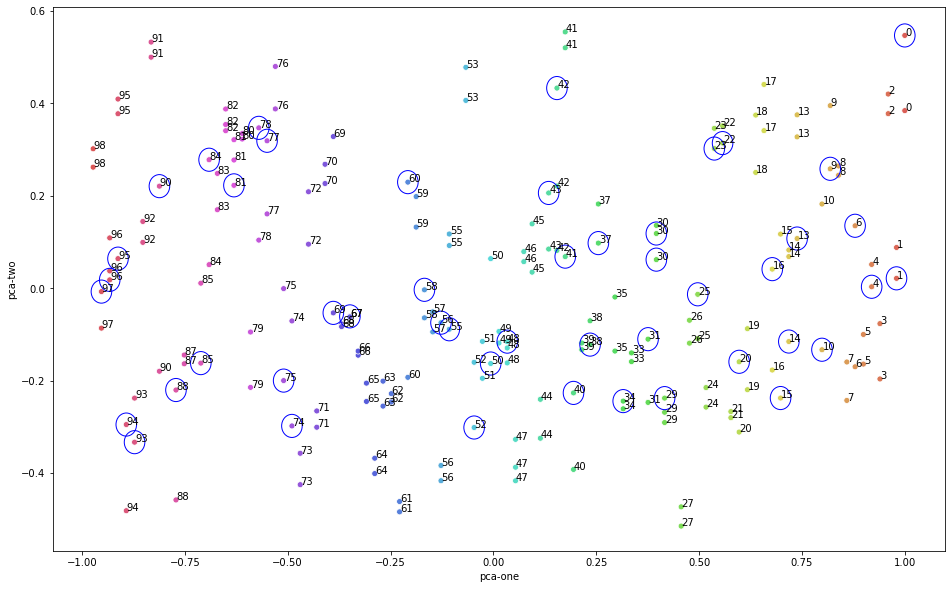

In [8]:
plt.figure(figsize=(16,10))
p = sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="y",
    palette=sns.color_palette("hls", unique_values),
    data=df_pca,
    legend=False
)

for i in range(0, df_pca.shape[0]):#, 10):
     p.text(df_pca["pca-one"][i]+0.001, df_pca["pca-two"][i],
     df_pca["y"][i], horizontalalignment='left',
     size='medium', color='black')

from matplotlib.patches import Ellipse
ax = plt.gca()
for i in range(0, df_pca.shape[0]):
    if df_pca["set"][i] == 'test':
        circle = Ellipse((df_pca["pca-one"][i], df_pca["pca-two"][i]), width=0.05, height=0.05, color='b', fill=False)
        ax.add_artist(circle)

In [9]:
df_test = df_pca[df_pca['set'] == 'test']
df_train = df_pca[df_pca['set'] == 'train']

from sklearn.metrics import accuracy_score
from metrics import mean_accuracy_at_k

k= 5
y_list = []
for i, row in df_test.iterrows():
    x_query = row['x0':'x127']
    x_support = df_train.loc[:, 'x0':'x127']
    query_result = np.linalg.norm(x_support.sub(x_query), axis=1)
    df_train['distance'] = query_result
    df_sorted = df_train.sort_values(by='distance', ignore_index=True)  # TODO: Indent?
    k_best = df_sorted['y'][:k]
    y_list.append(k_best)
y_list = np.array(y_list)
print(accuracy_score(df_test['y'], y_list[:,0]))
mean_accuracy_at_k(df_test['y'], y_list, k)

<ipython-input-9-1672ad259d89>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['distance'] = query_result


0.6875


0.8333333333333334

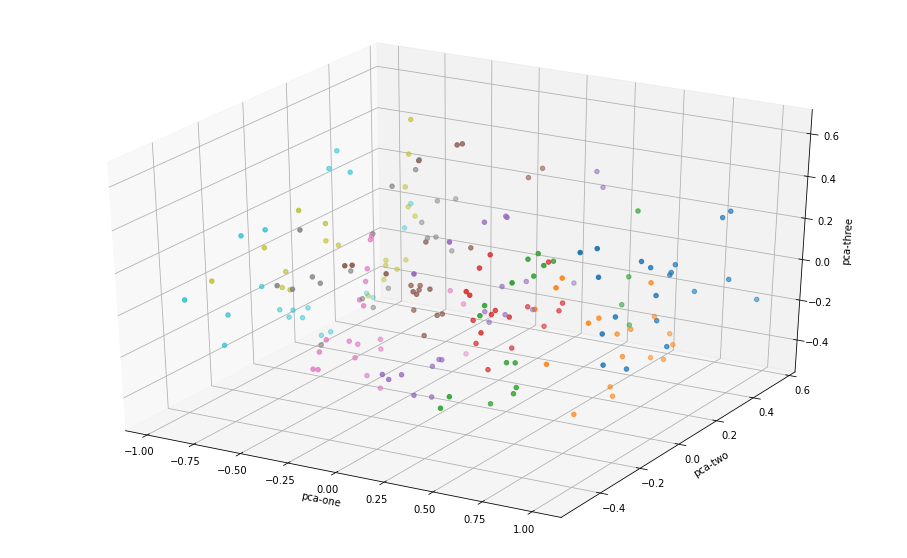

In [10]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=df_pca["pca-one"],
    ys=df_pca["pca-two"],
    zs=df_pca["pca-three"],
    c=df_pca["y"],
    cmap='tab10'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')

plt.show()

In [11]:
#tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=1000)
tsne_results = tsne.fit_transform(df.iloc[:,:-1])

df_pca['tsne-2d-one'] = tsne_results[:,0]
df_pca['tsne-2d-two'] = tsne_results[:,1]

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 196 samples in 0.000s...
[t-SNE] Computed neighbors for 196 samples in 0.028s...
[t-SNE] Computed conditional probabilities for sample 196 / 196
[t-SNE] Mean sigma: 7.515108
[t-SNE] KL divergence after 250 iterations with early exaggeration: 50.720444
[t-SNE] KL divergence after 800 iterations: 0.099174


In [12]:
with open("../../data/classes_direction.txt") as file:
    classes = [line.strip() for line in file]

df_pca["class"] = df_pca["y"].apply(lambda x: classes[x])
df_pca

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x126,x127,y,set,pca-one,pca-two,pca-three,tsne-2d-one,tsne-2d-two,class
0,0.086629,-0.139995,0.059610,0.161531,0.158688,-0.089611,0.025152,0.018460,-0.076599,-0.058290,...,-0.037365,-0.054589,1,test,0.979868,0.021608,0.119312,8.091749,7.821059,201506_l
1,0.137822,0.011910,-0.027875,-0.009749,0.069141,-0.038751,-0.006405,-0.160215,-0.032096,0.047751,...,-0.034371,0.097654,0,test,1.000000,0.547047,-0.175208,7.999871,8.036950,201506_r
2,-0.040215,0.108376,0.050487,0.142720,-0.103488,-0.001948,-0.217460,0.106564,-0.040653,-0.139507,...,0.078903,-0.020536,4,test,0.919470,0.003337,0.279099,7.461051,7.878982,202037_r
3,-0.152299,0.121531,0.114745,0.189124,-0.008420,0.065931,-0.237564,-0.039977,-0.043297,0.067985,...,0.051085,-0.110877,6,test,0.879204,0.135317,-0.078798,7.703207,7.233051,204295_r
4,0.180084,0.032558,0.001668,-0.051079,0.029999,0.131425,-0.097163,0.095653,0.150043,-0.043292,...,0.089886,0.018106,9,test,0.818797,0.258549,0.066670,7.274774,6.925648,209127_l
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,-0.051027,0.146768,-0.007720,0.157735,-0.058997,0.122254,-0.090888,-0.166865,0.087214,0.033990,...,-0.105355,-0.127630,95,train,-0.912689,0.377695,-0.371508,-9.415746,-9.420473,420639_r
192,-0.032641,0.186174,-0.120509,0.135433,-0.031945,0.151248,-0.061578,-0.146940,0.062474,0.068287,...,-0.088877,-0.082492,95,train,-0.912687,0.409483,-0.410428,-8.982730,-9.825989,420639_r
193,0.012696,0.052431,-0.055124,-0.167742,0.002949,0.100149,0.096182,-0.063017,-0.033991,0.094588,...,-0.143371,0.021784,97,train,-0.952953,-0.086117,-0.099791,-9.535917,-9.710445,420657_l
194,0.183537,0.064391,-0.059153,-0.052330,0.052703,0.115625,-0.112366,-0.137828,0.049240,0.047479,...,0.049084,0.046201,98,train,-0.973068,0.301915,0.364403,-9.493740,-9.909914,420657_r


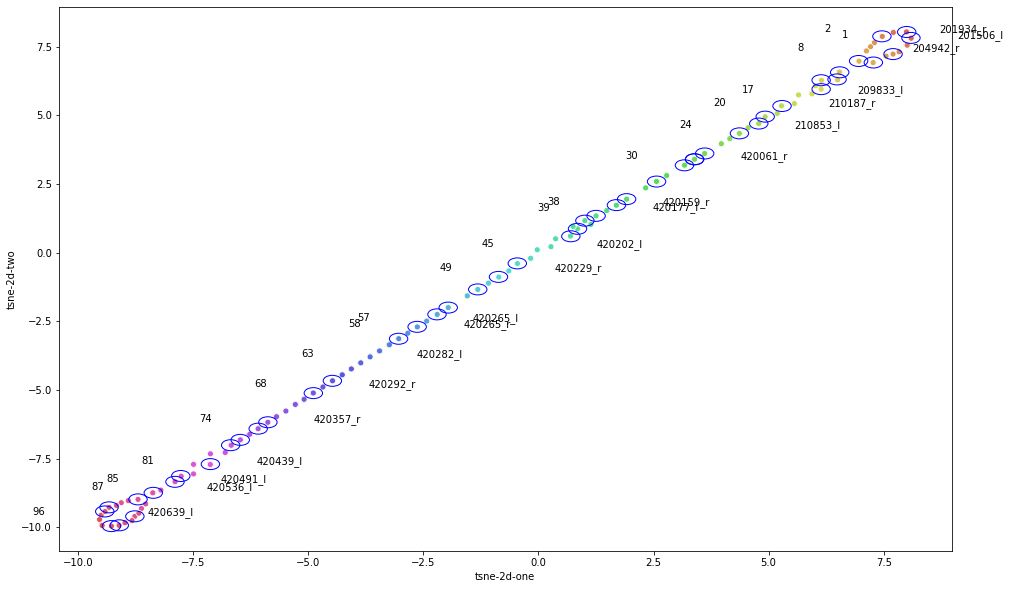

In [13]:
plt.figure(figsize=(16,10))
p1 = sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", unique_values),
    data=df_pca,
    legend=False
)

for i in range(0, df_pca.shape[0], 10):
     p1.text(df_pca["tsne-2d-one"][i]+1.0, df_pca["tsne-2d-two"][i],
     df_pca["class"][i], horizontalalignment='left',
     size='medium', color='black')
     p1.text(df_pca["tsne-2d-one"][i]-1.5, df_pca["tsne-2d-two"][i],
     df_pca["y"][i], horizontalalignment='left',
     size='medium', color='black')

ax = plt.gca()
for i in range(0, df_pca.shape[0]):
    if df_pca["set"][i] == 'test':
        circle = plt.Circle((df_pca["tsne-2d-one"][i], df_pca["tsne-2d-two"][i]), 0.2, color='b', fill=False)
        ax.add_artist(circle)

plt.savefig("tsne.png")

In [14]:
df_pca_portion = df_pca[df_pca['pca-two'] > 0]
selected_classes = list(df_pca_portion["class"])
selected_classes = [c.split("_")[1] for c in selected_classes]
from collections import Counter
cnt = Counter(selected_classes)
tup = zip(cnt.keys(), cnt.values())
for t in tup:
    print(t)

('l', 40)
('r', 51)
